In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functionst import * 
import numpy as np
%matplotlib inline
import scipy.stats as st

In [2]:
# Dataset1: Client Profiles: Demographics like age, gender, and account details of our clients.
file_path='data/df_final_demo.txt'
df_clients = pd.read_csv(file_path, delimiter=',')

In [3]:
# Dataset2: Digital Footprints pt1 & pt2: 
# A detailed trace of client interactions online, divided into two parts: pt_1 and pt_2. 
# It’s recommended to merge these two files prior to a comprehensive data analysis.
file_path='data/df_final_web_data_pt_1.txt'
df2 = pd.read_csv(file_path, delimiter=',')
file_path = "Data/df_final_web_data_pt_2.txt"
df3 = pd.read_csv(file_path, delimiter=',')
df_concat = pd.concat([df2, df3])  # Concatenated 

In [4]:
#Dataset 3: Experiment Roster: A list revealing which clients were part of the grand experiment.
file_path='data/df_final_experiment_clients.txt'
df_roster = pd.read_csv(file_path, delimiter=',')

Cleaning df_Clients

Check for Duplicates

In [5]:
df_clients.duplicated().sum() # Check

0

In [6]:
# Rename columns
df_clients.rename(columns={"clnt_tenure_yr": "client_tenure_yr",
                           "clnt_tenure_mnth":"client_tenure_mnth",
                           "clnt_age":"client_age",
                           "gendr":"gender",
                           "bal":"balance"
                           }, inplace=True)

In [7]:
# Checking for NaN Rows
nan_rows = df_clients[df_clients.isna().any(axis=1)]
# Drop NaN Values with more many NaNs
df_clients.dropna(thresh=4,inplace=True)
# Fill NaN in client age
df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)

# Drop NaN Values with more many NaNs 
df_clients.dropna(thresh=4,inplace=True)

# Fill NaN in client age
df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)

# Filled the Client tenure yr with NaN when Client age < then tenure
df_clients.loc[df_clients["client_tenure_yr"] > df_clients["client_age"], "client_tenure_yr"] = np.nan

/var/folders/z2/8yvwb6_51rd1bxl1j1s0xpm40000gp/T/ipykernel_5508/2641067477.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)
/var/folders/z2/8yvwb6_51rd1bxl1j1s0xpm40000gp/T/ipykernel_5508/2641067477.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [8]:
# Defining age Group and Assigning to client Data

df_clients["client_age_group"] = df_clients["client_age"].apply(age_group) # Age group aus Functions

Clean df_concat

In [9]:
# Transformed DATETIME
df_concat["date_time"] = pd.to_datetime(df_concat["date_time"])

In [10]:
df_concat.duplicated().sum()

10764

Joined Clients and Joined DC_Concat with Roster

In [11]:
# Joined Clients with the Roster an dropped the NaN Values
df_client_joined = pd.merge(df_clients,df_roster, how="left", on="client_id")

In [12]:
# Joined DF Concat with the Roster and dropped the duplicates
df_concat_joined = pd.merge(df_concat,df_roster, on="client_id", how="left")
df_concat_joined.dropna(subset="Variation",inplace=True)
df_concat_joined.drop_duplicates(inplace=True)
df_concat_joined['year_month'] = df_concat_joined['date_time'].dt.to_period('M') # Added year


Who are the clients

In [13]:
# Who are the clients? By Age
most_clients = df_clients.groupby("client_age_group")["logons_6_mnth"].sum().sort_values( ascending=False)
most_clients

client_age_group
old adults      85743.0
young adults    81766.0
older adults    74470.0
adults          62891.0
young senior    51061.0
teens           24007.0
senior          11281.0
old senior       1765.0
Name: logons_6_mnth, dtype: float64

Text(0, 0.5, 'logins last 6 month')

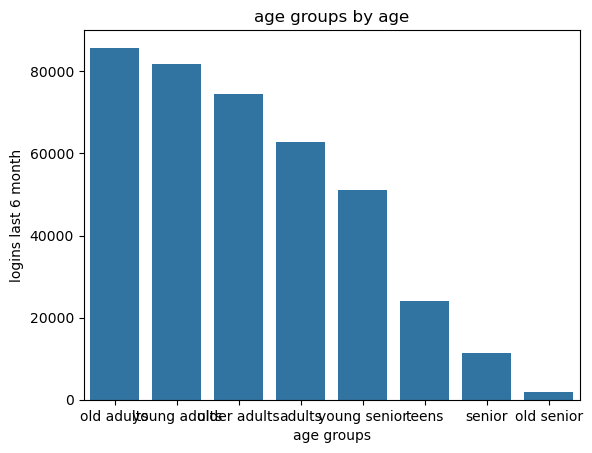

In [14]:
# Checking 
sns.barplot(data= most_clients)
plt.title("age groups by age")
plt.xlabel("age groups")
plt.ylabel("logins last 6 month")

In [15]:
# Who are the clients by tenure

Sorting df_concat and trying to calculate time of steps

In [16]:
# Joined Clients with the Roster an dropped the NaN Values
df_client_joined = pd.merge(df_clients,df_roster, how="left", on="client_id")
df_client_joined_cleaned = df_client_joined.dropna()

In [17]:
# Df_concat Sorted and time_diff_in minutes

# With this we are able to analyze
df_concat_joined_sorted = df_concat_joined.sort_values(by=['client_id', 'visit_id', 'date_time'])
df_concat_joined_sorted['time_diff_in_minutes'] = df_concat_joined_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds() / 60

In [18]:
df_concat_joined_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds() / 60

72018          NaN
72017     0.116667
72016     0.533333
72015     1.650000
72014     0.333333
            ...   
471736    0.350000
107095         NaN
107094    0.250000
356799         NaN
356798    0.133333
Name: date_time, Length: 317235, dtype: float64

COMPLETION RATE

In [19]:
# How many reached
df_concat_joined_sorted["process_step"].value_counts()

process_step
start      101153
step_1      68210
step_2      56672
step_3      48264
confirm     42936
Name: count, dtype: int64

## 1.KPI: USER EXPERIENCE

# Calls

In [20]:
# HYPOTHESESTEST: Two Sample T-test
# HO no difference in number of calls between Test & Control
# H1 there is difference between number of calls between Test & Control 


In [21]:
# Calculating Statistical Stuff Calls last 6 Month 

test = df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Test"]["calls_6_mnth"]
control= df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Control"]["calls_6_mnth"]

M1 = test.mean()
M2 = control.mean()
SD1 = test.std(ddof=1)
SD2 = control.std(ddof=1)
n1 = len(test)
n2 = len(control)

In [22]:
st.ttest_ind(test,control, equal_var=False)

TtestResult(statistic=-3.348638397521119, pvalue=0.0008127052569859838, df=49284.73108549173)

In [23]:
SD_pooled = np.sqrt(((n1 - 1) * SD1**2 + (n2 - 1) * SD2**2) / (n1 + n2 - 2))
cohens_d = (M1 - M2) / SD_pooled
cohens_d

-0.02996734220411194

Statement: 
p-value < 0.05: assuming there is no difference it is not likely to see no difference in sample: reject null hypotheses.
effectsize: -0.02 very small, not relevant

# Logins

In [24]:
# HYPOTHESESTEST
# HO no difference in number of logins between Test & Control
# H1 there is difference between number of logins between Test & Control 

In [25]:
df_Test_log = df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Test"]["logons_6_mnth"]
df_Control_log= df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Control"]["logons_6_mnth"]
st.ttest_ind(df_Test_log,df_Control_log, equal_var=False)

TtestResult(statistic=-3.2197513200195096, pvalue=0.0012838496093246267, df=49272.643050265775)

In [26]:
test_log= df_client_joined_cleaned[df_client_joined_cleaned['Variation']=='Test']['logons_6_mnth']
control_log= df_client_joined_cleaned[df_client_joined_cleaned['Variation']=='Control']['logons_6_mnth']

M1_log = test_log.mean() 
M2_log = control_log.mean()  
SD1_log = test_log.std(ddof=1) 
SD2_log = control_log.std(ddof=1)  
n1_log = len(test_log) 
n2_log = len(control_log)  

In [27]:
SD_pooled = np.sqrt(((n1_log - 1) * SD1_log**2 + (n2_log - 1) * SD2_log**2) / (n1_log + n2_log - 2))  #cohens d
cohens_d = (M1_log - M2_log) / SD_pooled
cohens_d

-0.028815745600392826

Statement: 
p-values: < 0.05 : there is a difference
effectsize: -0.02: very small, not relevant

# Number of Accounts

In [28]:
# H0: there is no significance difference in number of accounts
# H1: there is a significance difference in number of accounts

In [29]:
df_Test_acc = df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Test"]["num_accts"]
df_Control_acc= df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Control"]["num_accts"]
st.ttest_ind(df_Test_acc,df_Control_acc, equal_var=False)

TtestResult(statistic=-2.012832721884745, pvalue=0.044137689068619035, df=49005.313362693)

In [30]:
# effectsize:
control_acc= df_client_joined_cleaned[df_client_joined_cleaned['Variation']=='Control']["num_accts"]
test_acc= df_client_joined_cleaned[df_client_joined_cleaned['Variation']=='Test']["num_accts"]

M1_acc = test_acc.mean() 
M2_acc = control_acc.mean()  
SD1_acc = test_acc.std(ddof=1) 
SD2_acc = control_acc.std(ddof=1)  
n1_acc = len(test_acc) 
n2_acc = len(control_acc)  

In [31]:
# p-value (slightly) < 0.05: reject H0
# effectsize: -0.018 : not relevant 

# Balance of Accounts

In [32]:
# KPI balance 
# H0: no significance difference in account balance
# H0: no significance difference in account balance
# H1: there is a difference in account balance     
# -> p-value > 0.05: don't reject HO! 

In [33]:
df_Test_bal = df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Test"]["balance"]
df_Control_bal= df_client_joined_cleaned[df_client_joined_cleaned["Variation"]=="Control"]["balance"]
st.ttest_ind(df_Test_bal,df_Control_bal, equal_var=True)

TtestResult(statistic=-0.4299225555792149, pvalue=0.6672538243459556, df=50155.0)

In [34]:
SD_pooled = np.sqrt(((n1_acc - 1) * SD1_acc**2 + (n2_acc - 1) * SD2_acc**2) / (n1_acc + n2_acc - 2))
cohens_d = (M1_acc - M2_acc) / SD_pooled
cohens_d

-0.018037883758176016

## Performance Metrics


In [35]:
# Adding a column for every visit which led to finished and go through all 4 steps
finished_list = filter_complete_visit(df_concat_joined_sorted)
df_concat_joined_sorted["finished"] = df_concat_joined_sorted["visit_id"].apply(lambda x:"yes" if x in finished_list else "no" )

completion_rate_test = df_concat_joined_sorted[(df_concat_joined_sorted["finished"] == "yes") & (df_concat_joined_sorted["Variation"] == "Test")]["visit_id"].nunique()/df_concat_joined_sorted[df_concat_joined_sorted["Variation"]=="Test"]["visit_id"].nunique()

completion_rate_control = df_concat_joined_sorted[(df_concat_joined_sorted["finished"] == "yes") & (df_concat_joined_sorted["Variation"] == "Control")]["visit_id"].nunique()/df_concat_joined_sorted[df_concat_joined_sorted["Variation"]=="Control"]["visit_id"].nunique()

all_completion_rate = df_concat_joined_sorted[df_concat_joined_sorted["finished"] == "yes"]["visit_id"].nunique()/df_concat_joined_sorted["visit_id"].nunique()


In [36]:
print(F"Completion Rate Control = {completion_rate_control*100} %")
print(F"Completion Rate Test = {completion_rate_test*100} %")
print(F"Completion Rate All = {all_completion_rate*100} %")

Completion Rate Control = 46.000186399080434 %
Completion Rate Test = 48.066566135286514 %
Completion Rate All = 47.02983888447366 %


In [37]:
# Add client age group
df_concat_joined_sorted = pd.merge(df_concat_joined_sorted,df_client_joined_cleaned[["client_id","client_age_group"]], on="client_id", how="left")

In [38]:
# Creating a small Digital Footprint frame
df_small = df_concat_joined_sorted[["visit_id","finished","Variation","client_age_group"]].drop_duplicates(subset="visit_id")

In [39]:
# Creating a crosstab for digital Footprint

df_small_crosstab = pd.crosstab(df_small["Variation"], df_small["finished"])
df_small_crosstab

finished,no,yes
Variation,,
Control,17377,14751
Test,19281,17796


In [40]:
# Test for the dependency

#*determine whether there is a significant association between two categorical variables**. 

# H0 there is independence
# H1 there is dependance

chi2_statistic, chi2_pvalue,_,_= st.chi2_contingency(df_small_crosstab)
chi2_statistic,chi2_pvalue

(29.93013350096748, 4.4789755459143405e-08)

In [41]:
# Testing the how strong the dependancy effect
st.contingency.association(df_small_crosstab, method="cramer")

0.020825301940967364

First Statement: Test Completion is higher. The difference is according to our Analysis statistically significant giving us a p_value < 0.05 + a "Cramers_V" of 0.02 between 0-1


ERROR RATE based on Variation

In [42]:
# error rate
df_concat_joined = df_concat_joined.sort_values(by=['visit_id', 'date_time'])
df_concat_joined['previous_step'] = df_concat_joined.groupby('visit_id')['process_step'].shift(1) #shifts values on cell down 

In [43]:

# Mapping and also calculating the error rate

step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_concat_joined_sorted['process_step_numeric'] = df_concat_joined_sorted['process_step'].map(step_mapping)
df_concat_joined_sorted = df_concat_joined_sorted.sort_values(by=['visit_id', 'date_time'])
df_concat_joined_sorted['previous_step_numeric'] = df_concat_joined_sorted.groupby('visit_id')['process_step_numeric'].shift(1)
df_concat_joined_sorted['is_error'] = df_concat_joined_sorted['process_step_numeric'] < df_concat_joined_sorted['previous_step_numeric']

In [44]:
# calculating overall error rate
total_errors = df_concat_joined_sorted[df_concat_joined_sorted['is_error']==True].shape[0]
total_steps = df_concat_joined_sorted['process_step'].count()
overall_error_rate = total_errors / total_steps
overall_error_rate

0.08208425930304034

In [45]:
# calculating control error rate
total_errors_control = df_concat_joined_sorted[(df_concat_joined_sorted['Variation'] == 'Control') & (df_concat_joined_sorted['is_error'] == True)].shape[0]
total_steps_control = df_concat_joined_sorted[df_concat_joined_sorted['Variation'] == 'Control']['process_step'].count()
overall_error_rate_control = total_errors_control / total_steps_control
overall_error_rate_control

0.06902146069334547

In [46]:
# calculating test error rate
total_errors_test = df_concat_joined_sorted[(df_concat_joined_sorted['Variation'] == 'Test') & (df_concat_joined_sorted['is_error'] == True)].shape[0]
total_steps_test = df_concat_joined_sorted[df_concat_joined_sorted['Variation'] == 'Test']['process_step'].count()
overall_error_rate_test = total_errors_test / total_steps_test
overall_error_rate_test

0.09247364161653433

In [47]:
# crosstab
df_concat_joined_sorted['is_error'] = df_concat_joined_sorted['is_error'].replace({True: 'Yes', False: 'No'})
crosstab_result = pd.crosstab(df_concat_joined_sorted['Variation'], df_concat_joined_sorted['is_error'])
crosstab_result

is_error,No,Yes
Variation,,
Control,130836,9700
Test,160359,16340


In [48]:
# chi2
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value

(571.0942031486818, 3.245626110711381e-126)

In [49]:
# cramer's v 
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.04244061114913076

TIME STEPS

In [50]:
# Creating TEST AND CONTROL CONCAT
df_concat_test_final = df_concat_joined_sorted[df_concat_joined_sorted["Variation"] == "Test"]
df_concat_control_final = df_concat_joined_sorted[df_concat_joined_sorted["Variation"] == "Control"]

In [51]:
df_concat_test_final.groupby("process_step")["time_diff_in_minutes"].mean()

process_step
confirm    2.157950
start      2.528016
step_1     0.630078
step_2     0.804543
step_3     1.622604
Name: time_diff_in_minutes, dtype: float64

In [52]:
df_concat_control_final.groupby("process_step")["time_diff_in_minutes"].mean()

process_step
confirm    2.166280
start      2.911126
step_1     0.719683
step_2     0.647302
step_3     1.569328
Name: time_diff_in_minutes, dtype: float64

## Additional Metrics

CHECK FOR COMPLETION AND AGE

In [53]:
# Creating a crosstab for digital Footprint for CONTROL

crosstab_result_control_age = pd.crosstab(df_small[df_small["Variation"] == "Control"]["client_age_group"], df_small[df_small["Variation"] == "Control"]["finished"])
print(crosstab_result_control_age)
# Chi Test
chi2_statistic, chi2_pvalue,_,_= st.chi2_contingency(crosstab_result_control_age)
print(F"Values P Test {chi2_statistic},{chi2_pvalue}")

# Testing the how strong the dependancy effect
st.contingency.association(crosstab_result_control_age, method="cramer")

finished            no   yes
client_age_group            
adults            2507  2546
old adults        4106  3296
old senior         176    44
older adults      3138  2930
senior             887   315
teens              596   667
young adults      2941  3082
young senior      2942  1766
Values P Test 532.795916409853,7.098509573386206e-111


0.12915754652641784

In [54]:
# Creating a crosstab for digital Footprint for TEST

crosstab_result_test_age = pd.crosstab(df_small[df_small["Variation"] == "Test"]["client_age_group"], df_small[df_small["Variation"] == "Test"]["finished"])
print(crosstab_result_test_age)
# Chi Test
chi2_statistic, chi2_pvalue,_,_= st.chi2_contingency(crosstab_result_test_age)
print(F"Values P Test {chi2_statistic},{chi2_pvalue}")

# Testing the how strong the dependancy effect
st.contingency.association(crosstab_result_test_age, method="cramer")

finished            no   yes
client_age_group            
adults            2763  3078
old adults        4649  3816
old senior         165    73
older adults      3544  3444
senior            1018   359
teens              671   915
young adults      3039  3882
young senior      3315  2085
Values P Test 810.9918717508758,7.878106698843976e-171


0.14841915342722664

In [55]:
# Creating csv files
df_concat_joined_sorted.to_csv("concat_joined.csv")
df_client_joined_cleaned.to_csv("clientinfo.csv")